<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Maham Jamal
* **UCID** = 30153574
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [1]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

--2024-04-09 14:44:45--  https://archive.ics.uci.edu/static/public/236/seeds.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘seeds.zip’

seeds.zip               [ <=>                ]   9.21K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2024-04-09 14:44:45 (89.8 MB/s) - ‘seeds.zip’ saved [9432]

Archive:  seeds.zip
 extracting: seeds_dataset.txt       


In [2]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

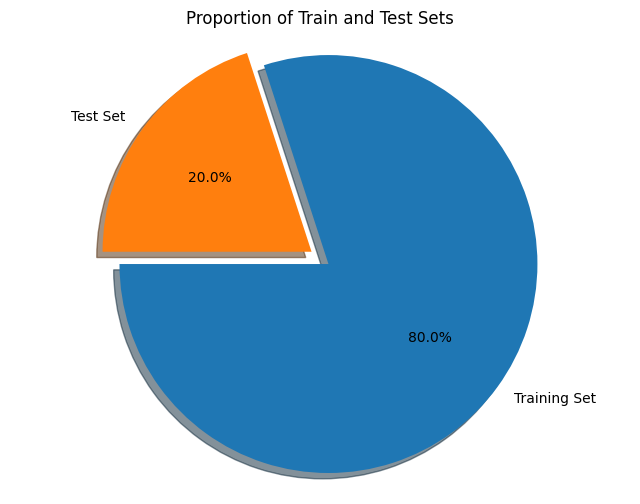

Number of entries in Training Set: 168
Number of entries in Test Set: 42


In [3]:
# 1.1

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# splitting the data into X and y
X = data.drop('Type', axis=1)
y = data['Type']

# Stratification used while splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# plotting training and testing propotion on a pie chart
# proportions
train_proportion = len(X_train) / len(X)
test_proportion = len(X_test) / len(X)
# plotting
labels = ['Training Set', 'Test Set']
sizes = [train_proportion, test_proportion]
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Proportion of Train and Test Sets')
plt.axis('equal')
plt.show()

print("Number of entries in Training Set:", len(X_train))
print("Number of entries in Test Set:", len(X_test))


<font color='Green'><b>Answer:</b></font>

- **1.1** .....................

### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


<font color='Green'><b>Answer:</b></font>

- **1.2**

## Selected Scalar: Min-Max
### ***Justification***

The min-max scaler was selected for this dataset. The Min-Max Scaler scales features to a given range by subtracting the minimum and then dividing by the range. This scaler preserves the shape of the original distribution and is suitable for features that follow a Gaussian distribution. Here are several justifications for choosing this scaler:

- **Preservation of Relationships:** The Min-Max Scaler preserves the relationships between data points and only shifts and scales the data so it's suitable as the relationships between features are meaningful and will help with classification.

- **Interpretability:** Min-Max scaling keeps the original data units intact and scales them linearly, making it easier to interpret the scaled features in the context of the original data. This dataset in particular has a research purpose and facilitates the analysis of features in X-ray images of wheat kernels, so using the min-max scaler may enhance the interpretablity and generalizability of results.

- **Robustness:** Min-Max scaling is less affected by outliers compared to other scalers like StandardScaler(). The data we are working with is mutlivariate and real-valued data so it is likely for outliers to be present.

- **Algorithm Suitability:** Many machine learning algorithms, such as SVC,  KNN and neural networks required appropriately scaled data. Min-Max scaling ensures that the features are within a consistent range, which can improve the stability and convergence of algorithms. Particulary for SVC, this model is sensitive to the scale of features so having features scaled to a common range can help improve performance.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Define the models
bagged_dt = BaggingClassifier()
svc = SVC()
logreg = LogisticRegression()

# Construct pipelines for each model including MinMaxScaler
bagged_dt_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('bagged_dt', bagged_dt)
])

svc_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svc', svc)
])

logreg_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', logreg)
])

# Fit and evaluate each model
models = {
    'Bagged Decision Trees': bagged_dt_pipeline,
    'Support Vector Classifier (SVC)': svc_pipeline,
    'Logistic Regression': logreg_pipeline
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Displaying metrics
for name, metrics in results.items():
    print(f"{name}:")
    print("Accuracy:", metrics['Accuracy'])
    print("F1 Score:", metrics['F1 Score'])
    print("----------------------")

# Ranking the models based on F1 Score and Accuracy
sorted_models = sorted(results.items(), key=lambda x: (x[1]['F1 Score'], x[1]['Accuracy']), reverse=True)
print("Ranking based on F1 Score and Accuracy:")
for i, (model, metrics) in enumerate(sorted_models):
    print(f"{i+1}. {model}: F1 Score - {metrics['F1 Score']}, Accuracy - {metrics['Accuracy']}")


Bagged Decision Trees:
Accuracy: 0.8809523809523809
F1 Score: 0.874375312343828
----------------------
Support Vector Classifier (SVC):
Accuracy: 0.9047619047619048
F1 Score: 0.8999999999999999
----------------------
Logistic Regression:
Accuracy: 0.9047619047619048
F1 Score: 0.8999999999999999
----------------------
Ranking based on F1 Score and Accuracy:
1. Support Vector Classifier (SVC): F1 Score - 0.8999999999999999, Accuracy - 0.9047619047619048
2. Logistic Regression: F1 Score - 0.8999999999999999, Accuracy - 0.9047619047619048
3. Bagged Decision Trees: F1 Score - 0.874375312343828, Accuracy - 0.8809523809523809


<font color='Green'><b>Answer:</b></font>

- **1.3**
## Support Vector Machine (SVM)
### ***Justification:***
- **Handling High-Dimensional Data:** SVM works well with high-dimensional datasets, which is suitable if your dataset has multiple features. In our case, the data has 7 geometric paramters measured for each kernel and is mutlivariate, so SVC can provide some meaningful insight on the more complex relations between features.

- **Non-Linearity:** SVM can capture complex relationships in data through the use of different kernel functions (e.g., radial basis function kernel), making it suitable for datasets with non-linear decision boundaries. Since the relations within the data are unknown as of now, SVC provides flexibility to experiement with different kernel functions. Using a different method like logisitic regression would assume a linear relation which may not be the case.

- **Robustness to Overfitting:** SVCs are good at generalizing and known to be less prone to overfitting. SVC aims to find a hyperplane which maximizes the margin between classes while simaloulataneoulsy minimizing classifcation errors. This will help with generalization to unseen data.

- **Regularization:** SVM provides regularization parameters which we can adjust. This is to avoid overfitting and will allow for better control over the  complexity of the model.

- **Previous Success in Similar Tasks:** SVC has been successfully applied in various classification tasks in biology. SVCs are effective in handling data like this which makes it a reasonable choice to select.

Additionally, after empirically comparing 3 different models (bagging decision tree classification, logistic regression and SVC), the SVC model appeared to perform the best overall.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [63]:
# 1.4
# Add necessary code here.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Constructing the pipeline with Min-Max Scaler and SVM classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Using Min-Max Scaler as selected in part 1.2
    ('svm', SVC())  # Using SVM classifier
])

# Define the hyperparameters and their ranges for grid search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Execute grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


<font color='Green'><b>Answer:</b></font>

- **1.4**

The best hyperparamters were found to be:
- C: 100
- gamma: scale
- kernel: rbf

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [53]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components for 2D dimensionality reduction
pca = PCA(n_components=2, random_state=42)

# Apply PCA to the training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Redo the grid search using the reduced two-dimensional data
pipeline_pca = Pipeline([
    ('svm', SVC())  # Using SVM classifier
])

# Define the hyperparameters and their ranges for grid search
param_grid = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Execute grid search with cross-validation
grid_search_pca = GridSearchCV(pipeline_pca, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the reduced two-dimensional data
grid_search_pca.fit(X_train_pca, y_train)

# Display the best hyperparameters
print("Best Hyperparameters with PCA:")
print(grid_search_pca.best_params_)





Best Hyperparameters with PCA:
{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [54]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to calculate specificity for multi-class classification
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(cm)
    specificity = []
    for i in range(num_classes):
        tn = sum(cm[j][j] for j in range(num_classes) if j != i)
        fp = sum(cm[i][j] for j in range(num_classes) if j != i)
        specificity.append(tn / (tn + fp))
    return specificity

# Function to calculate sensitivity for multi-class classification
def sensitivity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(cm)
    sensitivity = []
    for i in range(num_classes):
        tp = cm[i][i]
        fn = sum(cm[j][i] for j in range(num_classes) if j != i)
        sensitivity.append(tp / (tp + fn))
    return sensitivity

# Function to calculate metrics and return as a DataFrame
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    test_precision = precision_score(y_test, test_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')
    train_f1 = f1_score(y_train, train_preds, average='weighted')
    test_f1 = f1_score(y_test, test_preds, average='weighted')
    train_specificity = specificity_score(y_train, train_preds)
    test_specificity = specificity_score(y_test, test_preds)
    train_sensitivity = sensitivity_score(y_train, train_preds)
    test_sensitivity = sensitivity_score(y_test, test_preds)

    # Create a DataFrame to store the metrics
    metrics_df = pd.DataFrame({
        'Training Accuracy': [train_accuracy],
        'Testing Accuracy': [test_accuracy],
        'Training Precision': [train_precision],
        'Testing Precision': [test_precision],
        'Training Recall': [train_recall],
        'Testing Recall': [test_recall],
        'Training F1 Score': [train_f1],
        'Testing F1 Score': [test_f1],
    })

    # Add specificity and sensitivity to the DataFrame
    for i in range(len(train_specificity)):
        metrics_df[f'Training Specificity Class {i}'] = train_specificity[i]
        metrics_df[f'Testing Specificity Class {i}'] = test_specificity[i]
        metrics_df[f'Training Sensitivity Class {i}'] = train_sensitivity[i]
        metrics_df[f'Testing Sensitivity Class {i}'] = test_sensitivity[i]

    return metrics_df

# Calculate metrics for the original data without dimensionality reduction
original_metrics = calculate_metrics(grid_search.best_estimator_, X_train, y_train, X_test, y_test)

# Calculate metrics for the data with dimensionality reduction PCA
pca_metrics = calculate_metrics(grid_search_pca.best_estimator_, X_train_pca, y_train, X_test_pca, y_test)

# Concatenate metrics DataFrames for comparison
comparison_df = pd.concat([original_metrics, pca_metrics], keys=['Original', 'PCA'], axis=0)


comparison_df


,,Training Accuracy,Testing Accuracy,Training Precision,Testing Precision,Training Recall,Testing Recall,Training F1 Score,Testing F1 Score,Training Specificity Class 0,Testing Specificity Class 0,Training Sensitivity Class 0,Testing Sensitivity Class 0,Training Specificity Class 1,Testing Specificity Class 1,Training Sensitivity Class 1,Testing Sensitivity Class 1,Training Specificity Class 2,Testing Specificity Class 2,Training Sensitivity Class 2,Testing Sensitivity Class 2
Original,0,1.000000,0.880952,1.000000,0.887064,1.000000,0.880952,1.000000,0.877266,1.000000,0.870968,1.000000,0.909091,1.000000,0.960000,1.0,0.928571,1.000000,1.0,1.000000,0.823529
PCA,0,0.934524,0.857143,0.936642,0.862500,0.934524,0.857143,0.935132,0.850000,0.963303,0.843750,0.881356,0.900000,0.971963,0.958333,1.0,0.812500,0.963303,1.0,0.928571,0.875000


<font color='Green'><b>Answer:</b></font>

- **1.5**

## Dimensionality Reduction Choice: PCA
### ***Justification:***

Both PCA and t-SNE reduce the dimensionality of data while perseving the structure. However, each technique has different characteristics that make them suitable to use in different scenarios. In the case of our wheat kernel classification task, I selected PCA over t-SNE for several reasons.

First of all, PCA provides good interpretability. PCA reduces the original features to principal components, which are linear combinations. These are then ordered by the amount of variance they explain within the data. Each princpal component represents a direction in the original feature space. On the other hand, t-SNE does not perserve the distance relationships between data points in the original feature space. This may produce embeddings which are relatively more difficult to interepet.

Moving on, PCA preserves the global structure of the data, meaning that data points in close proximity remain in close proximity before and after reducing the dimensions of the feature space. This is important while studying the wheat kernels in our data set as the overall geometric properties of kernels across different varieties can be of interest. t-SNE, in contrast, usually preserves local structure but can distort the overall global structure. This makes t-SNE less suitable for our classification task as we wish to preseve relationships between data points across different classes and varietes.

Furthermore, PCA is computationally efficient compared to t-SNE. PCA is able to handle large data sets with many features, which we have. Our dataset involves the measurements of 7 different geometric paramters and has a relatively large number of kernel samples across the 3 variations. Moreover, the geometric paramaters are:

- Area
- Perimeter
- Compactness
- Length of Kernel
- Width of Kernel
- Asymmetry Coefficient
- Length of Kernel Groove

It is reasonable to assume that the relationships between these properties of the wheat kernel exhibit some level of linearity in their relationship. PCA is suitable to capture this. t-SNE is better able to capture non-linear relationships and while there may be some non-linear relations within the dataset, it is safe to assume the geometric properties may be more linear than non linear.

Comparing the metrics for before and after dimensionality reduction, we can see that generally, the original dataset achieved higher performance metrics across various evaluation measures compared to the dataset after PCA. For instance, in terms of accuracy, precision, recall, and F1-score, the original dataset performed better in the testing phase. However, after PCA, there were improvements in some metrics like specificity for certain classes and a slight decrease in others like sensitivity for class 0. These changes indicate the impact of dimensionality reduction on the performance of the machine learning model. This indicates that PCA may have resulted in loss of information that was important to the SVC() model with the classification task.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

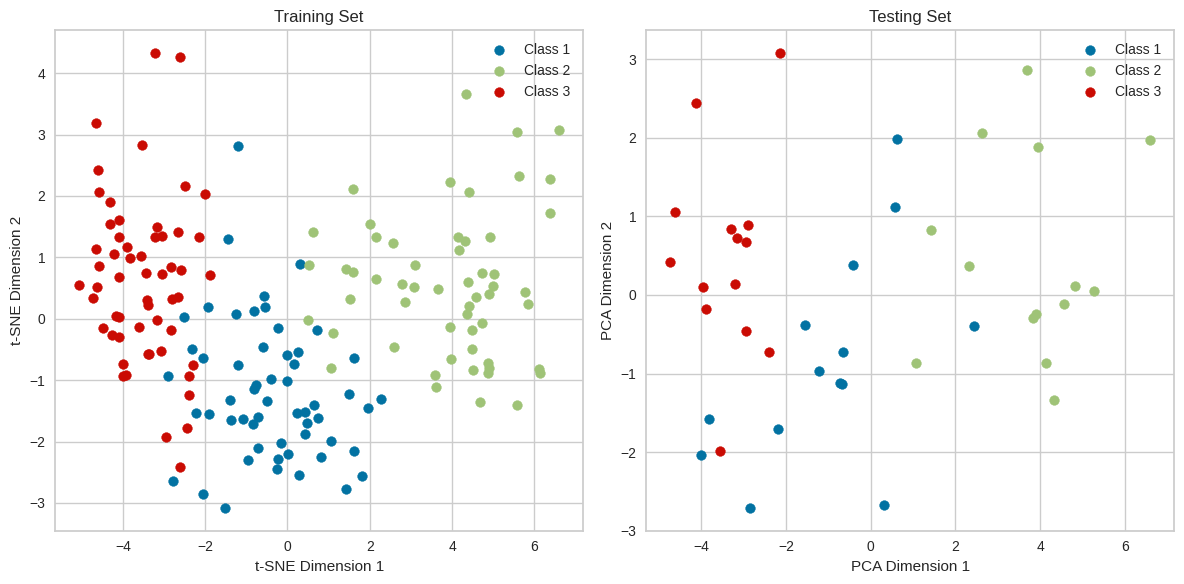

In [55]:
# 1.6
# Add necessary code here.

import matplotlib.pyplot as plt

# Create subplots for training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for training set

# Scatter plot for training set
for i, label in enumerate(['Class 1', 'Class 2', 'Class 3']):
    axs[0].scatter(X_train_pca[y_train == i + 1, 0], X_train_pca[y_train == i + 1, 1], label=label)


axs[0].set_title('Training Set')
axs[0].set_xlabel('t-SNE Dimension 1')
axs[0].set_ylabel('t-SNE Dimension 2')
axs[0].legend()

# Scatter plot for testing set
for i, label in enumerate(['Class 1', 'Class 2', 'Class 3']):
    axs[1].scatter(X_test_pca[y_test == i + 1, 0], X_test_pca[y_test == i + 1, 1], label=label)

axs[1].set_title('Testing Set')
axs[1].set_xlabel('PCA Dimension 1')
axs[1].set_ylabel('PCA Dimension 2')
axs[1].legend()

plt.tight_layout()
plt.show()


## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

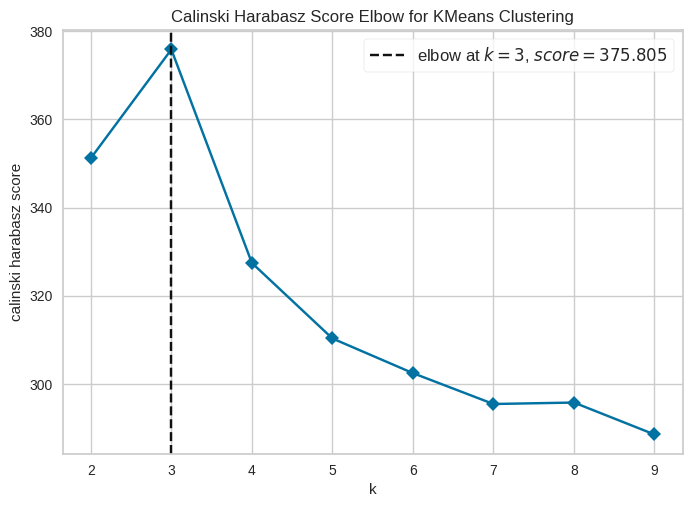

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Constructing the pipeline with Standard Scaler and KMeans clustering algorithm
pipeline = make_pipeline(
    StandardScaler(),  # Using Standard Scaler for feature scaling
    KMeans(n_init=10, random_state=42)  # Specify the value of n_init
)

# Instantiate the KelbowVisualizer with the KMeans clustering pipeline
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2, 10), metric='calinski_harabasz', timings=False)

# Fit the visualizer to the data and display the plot
visualizer.fit(X)  # Assuming X contains the data for clustering
visualizer.show()


<font color='Green'><b>Answer:</b></font>

- **2.1**

The elbow method is a tool used to determine the optimal number of clusters in a dateset for clustering alogorithms like K-means. The within-cluster sum of squares is plotted against the number of clusters and the elbow point is found whre the rate of decrese in the WCSS slows down significantly. Looking at the Kelbow visualizer, we can see that a k of 2 has a relatively high calinski harabasz score. The elbow of the graph is seen at k = 3, as expected. Our dataset has 3 differennt kernels to our knowledge so it makes sense that the most optimal number of clusters is 3. As the  number of K increases, the score decreases following k =3, showing that it is unlikely that there are more than 3 differnt kernels present (A fact which we can confirm).


### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [57]:
# 2.2
# Add necessary code here.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

optimal_k = 3

# Constructing the pipeline with Standard Scaler and KMeans clustering algorithm
pipeline = make_pipeline(
    MinMaxScaler(),  # Using Standard Scaler for feature scaling
    KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Specify the optimal number of clusters
)

# Fit the pipeline to the training data
pipeline.fit(X_train)

# Predict the cluster labels for the training data
train_cluster_labels = pipeline.predict(X_train)

# Add the predicted cluster labels as a new column in the training data
X_train_labeled = X_train.copy()
X_train_labeled['ClusterLabel'] = train_cluster_labels

# Display the labeled training data
print(X_train_labeled)


      Area  Perimeter  Compactness  Length of Kernel  Width of Kernel  \
178  11.48      13.05       0.8473             5.180            2.758   
62   12.36      13.19       0.8923             5.076            3.042   
54   14.52      14.60       0.8557             5.741            3.113   
164  11.14      12.79       0.8558             5.011            2.794   
207  13.20      13.66       0.8883             5.236            3.232   
..     ...        ...          ...               ...              ...   
163  12.55      13.57       0.8558             5.333            2.968   
209  12.30      13.34       0.8684             5.243            2.974   
82   20.20      16.89       0.8894             6.285            3.864   
184  12.89      13.77       0.8541             5.495            3.026   
169  11.24      13.00       0.8359             5.090            2.715   

     Asymmetry Coefficient  Length of Kernel Groove  ClusterLabel  
178                  5.876                    5.002    

### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [58]:
# 2.3
# Add necessary code here.
from sklearn.decomposition import PCA

# Constructing the PCA object with 2 components for 2D dimensionality reduction
pca = PCA(n_components=2)

# Fit PCA to the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Display the shape of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)


Shape of X_train_pca: (168, 2)
Shape of X_test_pca: (42, 2)


#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

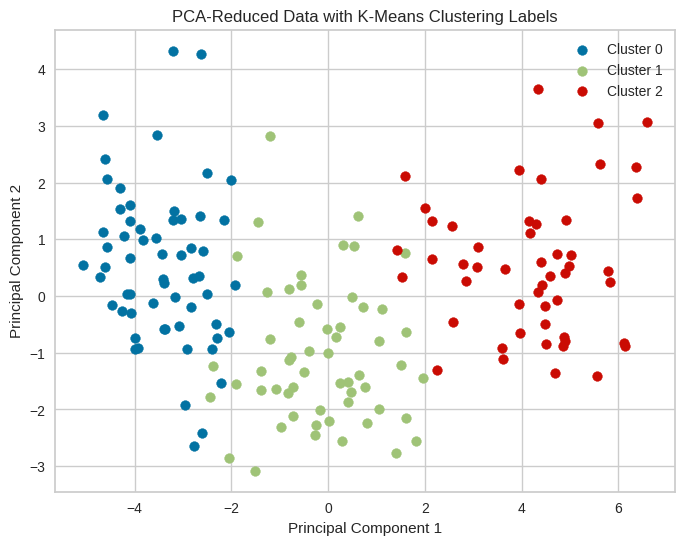

In [59]:
# 2.4
# Add necessary code here.

import matplotlib.pyplot as plt

# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(8, 6))
for cluster_label in set(train_cluster_labels):
    plt.scatter(X_train_pca[train_cluster_labels == cluster_label, 0],
                X_train_pca[train_cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')

# Add labels and a legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-Reduced Data with K-Means Clustering Labels')
plt.legend()
plt.grid(True)
plt.show()


## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

- **Bonus Question**
The 2D PCA plot with K-Means clustering labels reveals interesting insights about the data distribution and cluster separation. Let’s break down the observations:

### Cluster Separation:
- The plot shows three distinct clusters labeled as Cluster 0, Cluster 1, and Cluster 2.
- Each cluster is represented by a different color: blue for Cluster 0, green for Cluster 1, and red for Cluster 2.
- These clusters are distributed along the Principal Component 1 (PC1) and Principal Component 2 (PC2) axes.

### Cluster Interpretation:
- Cluster 0 (Blue):
Located towards the left side of the plot.
Indicates data points with unique characteristics distinct from the other two clusters. A very distinct kernel type.
- Cluster 1 (Green):
Positioned in the center of the plot.
Shows some overlap with both Clusters 0 and 2.
Suggests these kernels have mixed features or intermediate characteristics.
- Cluster 2 (Red):
Located on the right side of the plot.
Also exhibits distinct characteristics but has some overlap with Cluster 1. Another distinct kernel type but some similarity to the green kernels.

### Patterns and Insights:
- **Effective Separation:** K-Means successfully identified distinct groups within the PCA-reduced data.
- **Overlap:** Some shared characteristics or potential noise exist between clusters which could be explore further.
- **Variability:** The distribution along both principal components indicates variability in underlying features.
In summary, this plot provides valuable information about the data’s structure and the effectiveness of K-Means clustering.